In [1]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [24]:
# loading the file containing the data set

df = pd.read_csv("hotel_booking.csv")

In [25]:
# performing EDA

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [11]:
df.shape

(119390, 36)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
# changing the data type of reservation_status_date to date time

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [28]:
# counting null values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [29]:
# dropping columns company and agent having less null values
df.drop(['company','agent'],axis = 1,inplace = True)

In [30]:
df.dropna(inplace = True)

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

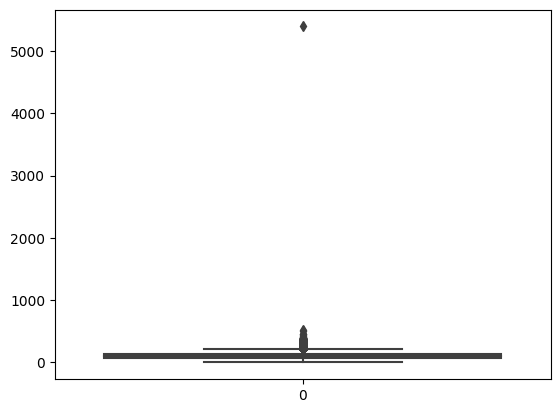

In [32]:
# finding the outliers

sns.boxplot(df['adr'])

In [33]:
# making our dataset outliers free

df = df[(df['adr']<5000) & (df['adr']>0) ]

In [34]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000
mean,0.375767,105.376879,2016.161443,27.138109,15.805050,0.937687,2.522974,1.862438,0.104824,0.007866,0.027959,0.086963,0.119795,0.216505,2.347373,103.649070,0.061997,0.571273
std,0.484322,106.944356,0.706509,13.561162,8.783049,0.993329,1.885574,0.481129,0.400296,0.097102,0.164855,0.850186,1.432435,0.633569,17.712061,46.646454,0.244426,0.791495
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


0    0.624233
1    0.375767
Name: is_canceled, dtype: float64


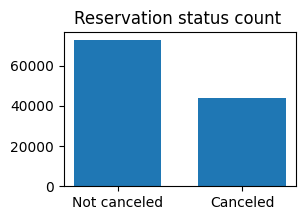

In [41]:
# checking the percentage of canceled and not canceled hotel bookings

cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
plt.figure(figsize = (3,2))
plt.title("Reservation status count ")
plt.bar(["Not canceled","Canceled"],df["is_canceled"].value_counts(), width= 0.7)
plt.show()

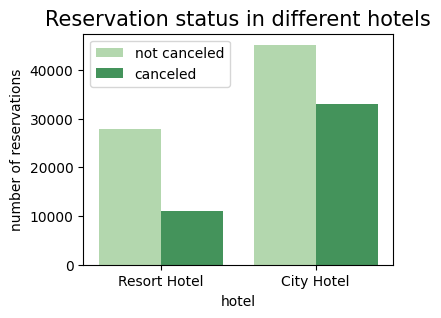

In [42]:
# calculating the canceled and not canceled bookings of different hotels

plt.figure(figsize = (4,3))
ax1 = sns.countplot(x = "hotel", hue = "is_canceled", data = df, palette = "Greens")
legend_labels,_ = ax1.get_legend_handles_labels()
plt.title("Reservation status in different hotels", size = 15)
plt.xlabel("hotel")
plt.ylabel("number of reservations")
plt.legend(["not canceled","canceled"])
plt.show()

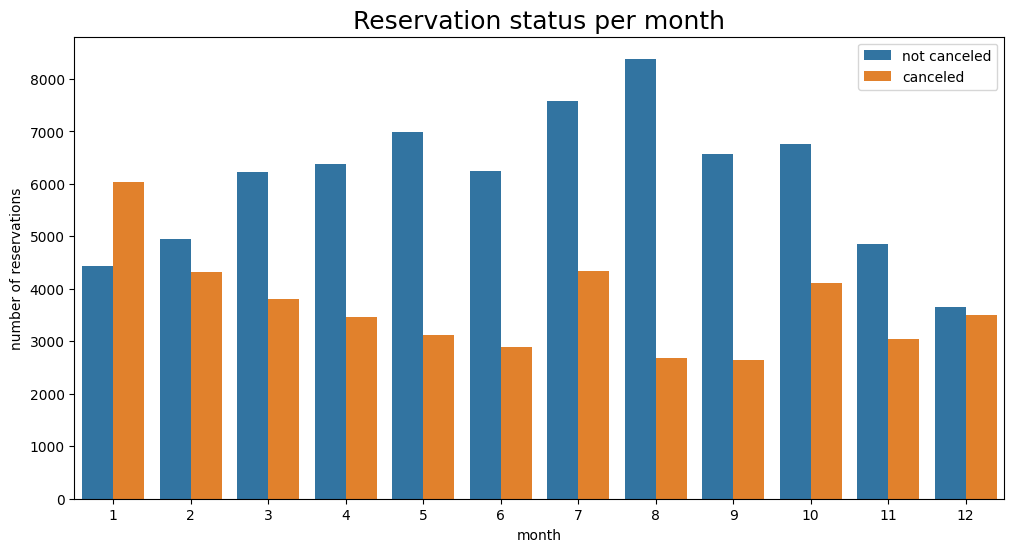

In [46]:
# calculating canceled and not canceled bookings on monthly basis

df["month"]= df['reservation_status_date'].dt.month
plt.figure(figsize = (12,6))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data= df)
legend_labels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation status per month', size = 18)
plt.xlabel("month")
plt.ylabel("number of reservations")
plt.legend(["not canceled", "canceled"])

plt.show()

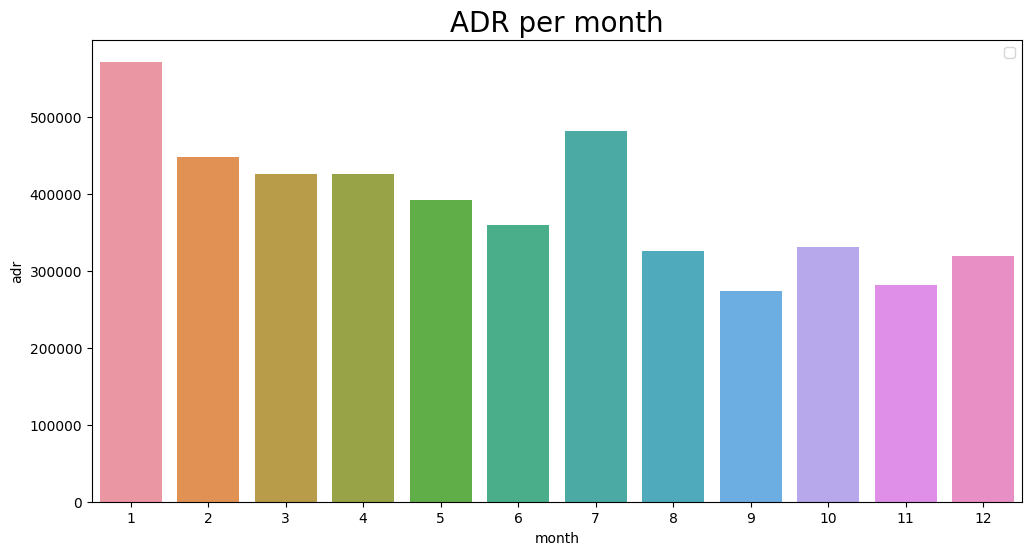

In [52]:
# calculating ADR on montly basis to know the actual reason for the cancellation of bookings

plt.figure(figsize = (12,6))
plt.title( "ADR per month", fontsize = 20)
df2 = df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index()
sns.barplot(x="month", y="adr", data=df2)
plt.legend(fontsize=10)
plt.show()


# **Conclusion** -
 We can gain insights from our analysis that as the prices of the hotel room increases the cancellation rate increases.
 We can see that in January 'adr' was the maximum and so does the cancellation rate.
 In August and September 'adr' was low and so the cancellation rate was also low in these months.

